<a href="https://colab.research.google.com/github/salvatore-juarezh/inteligencia-artificial/blob/main/cnn/clasi_numrs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#lo que dara los digitos
from sklearn.datasets import load_digits
#carga instancia
digits = load_digits()


In [ ]:
#hacer sentencia
#digits.keys()


In [ ]:
#resultadodict_keys([
    'data', 'target', 'frame',
    'feature_names', 'target_names', 'images',
    'DESCR'
])


In [ ]:
#atributos de los numeros
print(digits.DESCR)


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [ ]:
index = 7


In [ ]:
#se toma la imagen y el tarjet
image = digits.images[index]
label = digits.target[index]


In [ ]:
#matriz: valores cercanos a 16 color oscuro, valores cero, blaco
print(image)


[[ 0.  0.  7.  8. 13. 16. 15.  1.]
 [ 0.  0.  7.  7.  4. 11. 12.  0.]
 [ 0.  0.  0.  0.  8. 13.  1.  0.]
 [ 0.  4.  8.  8. 15. 15.  6.  0.]
 [ 0.  2. 11. 15. 15.  4.  0.  0.]
 [ 0.  0.  0. 16.  5.  0.  0.  0.]
 [ 0.  0.  9. 15.  1.  0.  0.  0.]
 [ 0.  0. 13.  5.  0.  0.  0.  0.]]


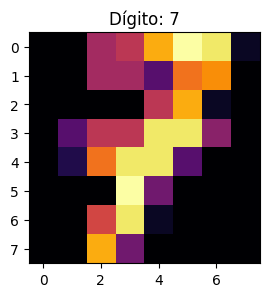

In [ ]:
#imagen en mat
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.inferno)
plt.title(f'Dígito: {label}')
plt.show()


In [ ]:
#separas para hacer entrenamiento
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)
#clasifica los resultados y clasifica el vector
# One-hot encode the target variable
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
#entrenamiento
#1437 filas 64 columnas
print(X_train.shape)
print(X_test.shape)


(1437, 64)
(360, 64)


In [ ]:
#acomodar la matriz
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)


tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [ ]:
#normalizacion codigo
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalizar los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
# Redondeamos para tener una mejor visualizacion
reshaped_tensor =  tf.floor(reshaped_tensor * 100) / 100
print(reshaped_tensor)

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [ ]:
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Crear el modelo de CNN
model = Sequential([
    #kernel3x3 imagen matriz
    Conv2D(32, kernel_size=(3, 3),
        activation='relu',
        input_shape=(8, 8, 1)
    ),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    #capa de salida
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [ ]:
#uos de optimizador adam en el modelo y acuracy para rendimiento
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
#entrenamiento y epocas para aprendizaje
history = model.fit(
    X_train, y_train,
    epochs=25,
    batch_size=32,
    validation_split=0.2
)
#vayan hacia 1 en loss

Epoch 1/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9984 - loss: 0.0260 - val_accuracy: 0.9688 - val_loss: 0.0902
Epoch 2/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9966 - loss: 0.0246 - val_accuracy: 0.9688 - val_loss: 0.0882
Epoch 3/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9978 - loss: 0.0217 - val_accuracy: 0.9583 - val_loss: 0.1127
Epoch 4/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9999 - loss: 0.0194 - val_accuracy: 0.9653 - val_loss: 0.0947
Epoch 5/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9992 - loss: 0.0125 - val_accuracy: 0.9688 - val_loss: 0.0760
Epoch 6/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9995 - loss: 0.0121 - val_accuracy: 0.9688 - val_loss: 0.0788
Epoch 7/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9990 - loss: 0.0108 - val_accuracy: 0.9722 - val_loss: 0.0811
Epoch 8/25
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9990 - loss: 0.0094 - val_accuracy: 0.9653 - val_loss:

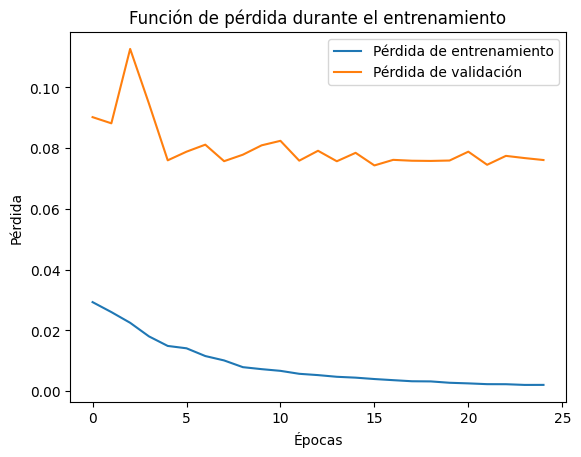

In [ ]:
# para visulizar la perdida y validacion
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()
#"El modelo esta funcionando bien, pero después de la época 15 comienza a sobreajustarse a los datos de entrenamiento, lo que hace que su rendimiento en datos nuevos deje de mejorar y empeore."

In [ ]:
#presicion 97% buebo
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9702 - loss: 0.0651  
Loss: 0.06970874965190887, Accuracy: 0.9694444537162781


In [ ]:
#matriz de confusion
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


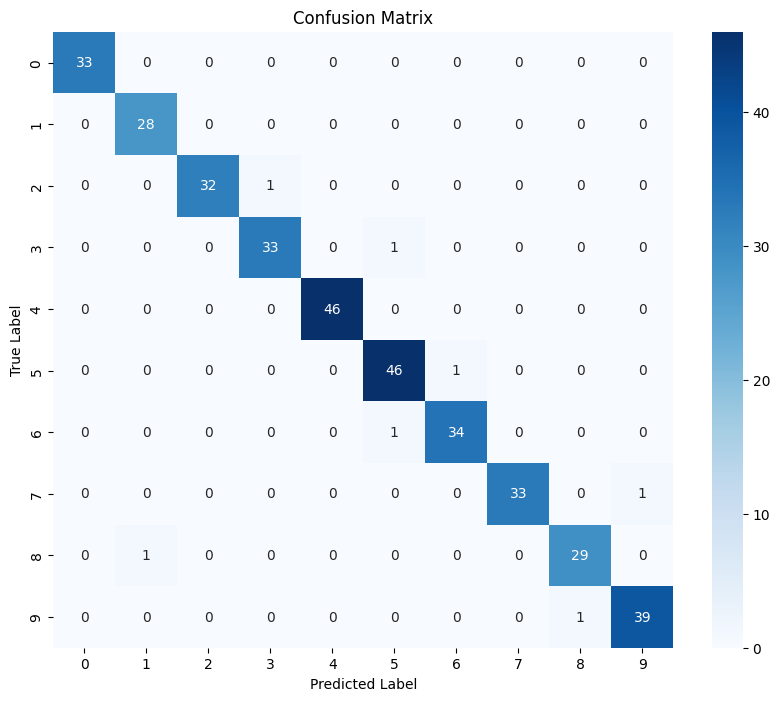

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 0.9696969696969697
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 0.9666666666666667
Class 9: 0.975


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')
    #46 en 4 predijo en 1 el 6 algunas predicciones erroneas que tuvo el modelo, son minimas

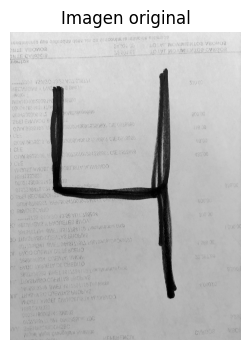

In [ ]:
#prediccion de imagen
from PIL import Image
import matplotlib.pyplot as plt

# Cambia por el nombre de tu archivo (carga de archivo)
ruta = "/content/mi_numero(2).png"
# Escala de grises ("L")
img = Image.open(ruta).convert("L")

# mostrar la imagen y tamaño que tendra
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Imagen original")
plt.axis("off")
plt.show()


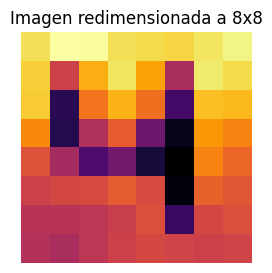

In [ ]:
import matplotlib.pyplot as plt

#reducir la imagen a una resolución mínima de 8x8 píxeles
# LANCZOS es un algoritmo que preserva detalles al reducir tamaño
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# Crear una visualización compacta para ver el resultado
plt.figure(figsize=(3, 3))
# Mostrar la imagen mini con paleta de colores
# (escala que va de negro a amarillo intenso)
plt.imshow(img_resized, cmap="inferno")
plt.title("Imagen redimensionada a 8x8")
plt.axis("off")  # Eliminar ejes coordenados para mejor presentación
plt.show()

# Guardar la imagen en archivo
img_resized.save("imagen_8x8.png")

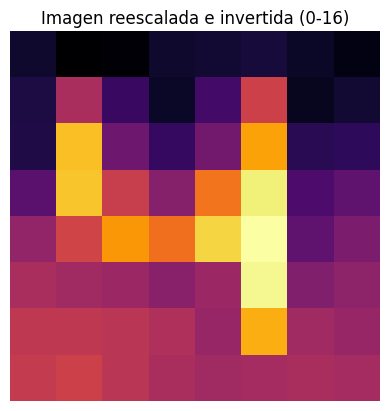

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Transformacion de la imagen: convertir escala 0-255 a 0-16 e invertir colores
# Ahora los pixeles más oscuros (originalmente cerca de 0) serán valores altos (cerca de 16)
# y los pixeles claros (originalmente cerca de 255) serán valores bajos (cerca de 0)
img_array = np.array(img_resized).astype("float32")
img_array = 16 - (img_array / 255 * 16)

# Visualizar la imagen procesada usando una paleta de colores (a elegir)
# Esta paleta va de negro (valores bajos) a amarillo/blanco (valores altos)
plt.imshow(img_array, cmap="inferno")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")  # Ocultar ejes para mejor visualización
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# normalizar
scaler = StandardScaler()
img_flat = img_array
img_scaled = scaler.fit_transform(img_flat)

# Dar forma (1,8,8) que es el input del modelo
img_tensor = img_scaled.reshape(1, 8, 8)

In [ ]:
pred = model.predict(img_tensor)
digit = np.argmax(pred)
print("Predicción:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Predicción: 4
